# Vizualization and Statistical EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use("ggplot")
matplotlib.rcParams["figure.figsize"] = (18, 8)

In [2]:
data = pd.read_csv("power_data.csv", index_col=[0], parse_dates=[0])
data = data.set_index("Datetime")
data.index = pd.to_datetime(data.index)
data.sort_index(inplace=True)
data.head()

,Power_MWH
Datetime,
2010-01-01 00:00:00,31647.0
2010-01-01 01:00:00,30075.0
2010-01-01 02:00:00,28907.0
2010-01-01 03:00:00,27906.0
2010-01-01 04:00:00,27373.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 75255 entries, 2010-01-01 00:00:00 to 2018-08-03 00:00:00
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Power_MWH  75255 non-null  float64
dtypes: float64(1)
memory usage: 1.1 MB


### Checking For Duplicates And Imputing Missing Values

In [4]:
# Duplicate Checks
duplicate_index = data[data.index.duplicated()]
data.loc[duplicate_index.index.values, :]

,Power_MWH
Datetime,
2014-11-02 02:00:00,22935.0
2014-11-02 02:00:00,23755.0
2015-11-01 02:00:00,21567.0
2015-11-01 02:00:00,21171.0
2016-11-06 02:00:00,21692.0
2016-11-06 02:00:00,20795.0
2017-11-05 02:00:00,20666.0
2017-11-05 02:00:00,21236.0


#### Data Issue
- Since the data collection methodology is unknown, we are forced to assume and replace the duplicates with their mean value

In [5]:
# replacing duplicates with the mean value
data = data.groupby("Datetime").agg(np.mean)
data = data.asfreq("H")

In [6]:
# Check for missing values
len(data[data["Power_MWH"].isna()])

14

In [7]:
# Imputing missing values using mean interpolation as there are only few missing cases
data["Power_MWH"] = data["Power_MWH"].interpolate(limit_area="inside", limit=None)

## Visual Exploration Of Data

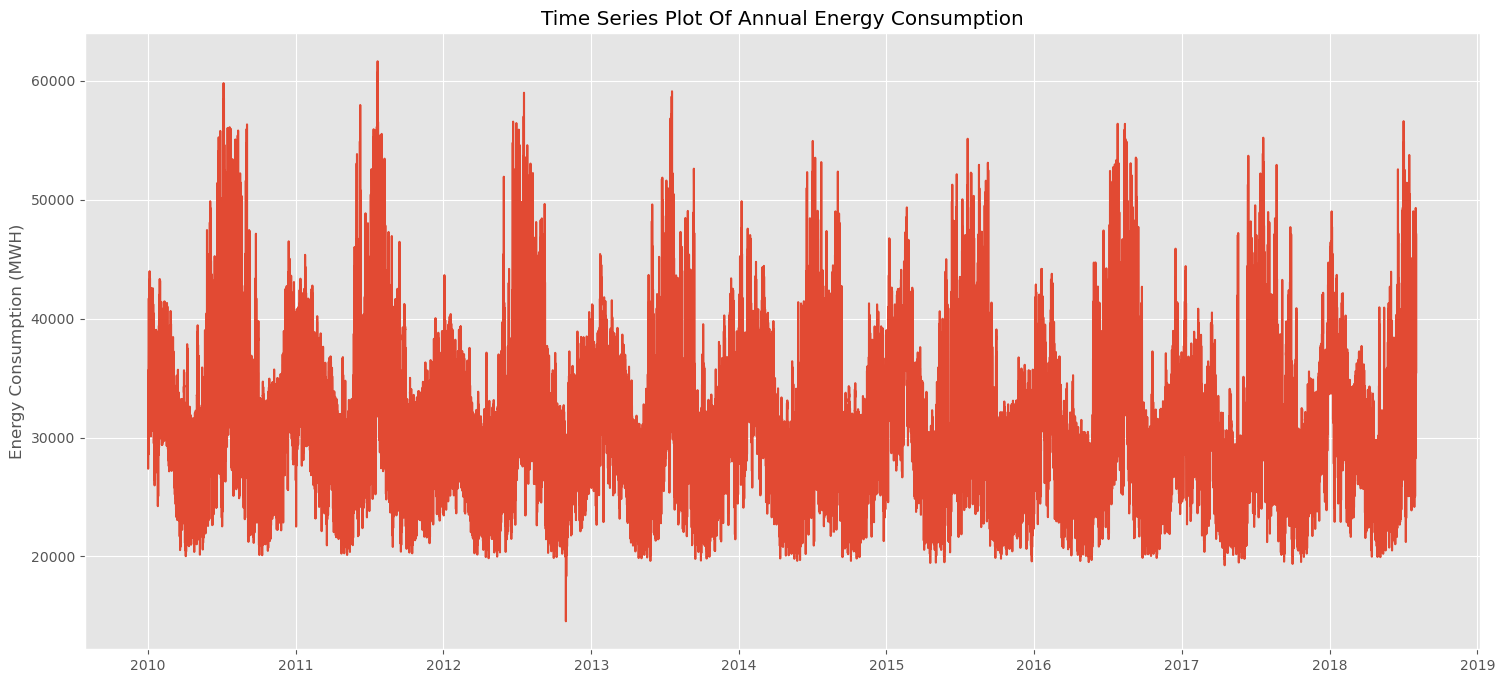

In [22]:
# Plotting time series
plt.plot(data.index, data["Power_MWH"])
plt.title('Time Series Plot Of Annual Energy Consumption')
plt.ylabel('Energy Consumption (MWH)')
plt.savefig('images/annual_energy_consumption_plot.png')
plt.show()

## Observations:
- We can clearly see annual seasonal pattern i.e repeating patterns over the years. We can try observing the data at a more granular level i.e week level inorder to better analyse the trend and seasonal behaviour.

### Observing the time series plot at a week level

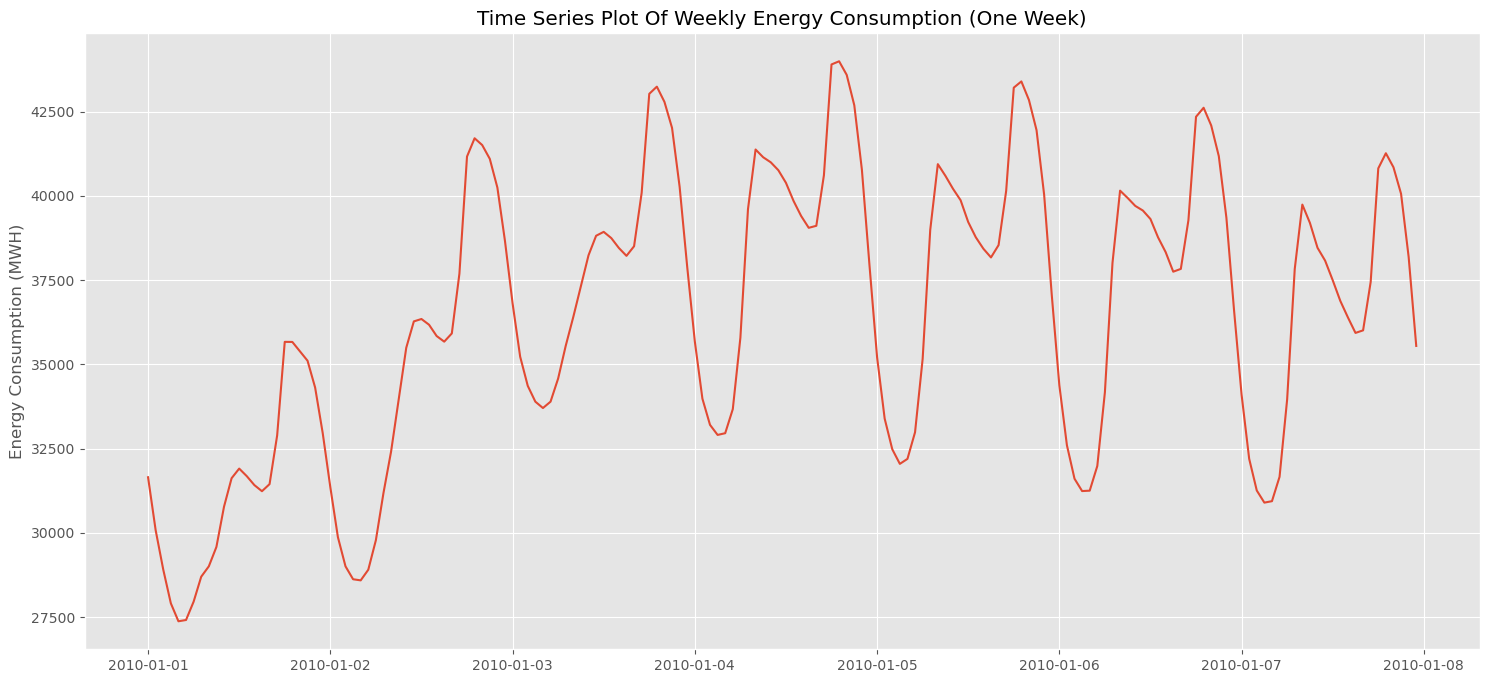

In [24]:
week_end_index = 24*7
plt.plot(data.index[:week_end_index], data['Power_MWH'][:week_end_index])
plt.title('Time Series Plot Of Weekly Energy Consumption (One Week)')
plt.ylabel('Energy Consumption (MWH)')
plt.savefig('images/weekly_energy_consumption_plot.png')
plt.show()

## Observations
- We can clearly see a daily seasonal behaviour indicating a consistent and predictable energy consumption demand during the week. This can help us to understand when the energy demand is typically higher/lower during the week.
- The graph shows a fluctuating trend which indicates that during certain days/time of the week the energy consumed is higher

### Understanding the trend and seasonal behaviour of our data by hourly, daily, monthly and yearly

In [8]:
# Creating time series features
def create_date_feat(df):
    df = df.copy()
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.isocalendar().week
    df.drop('date', axis=1, inplace=True)
    
    return df

In [9]:
data = create_date_feat(data)
data.head()

,Power_MWH,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Datetime,,,,,,,,,
2010-01-01 00:00:00,31647.0,0,4,1,1,2010,1,1,53
2010-01-01 01:00:00,30075.0,1,4,1,1,2010,1,1,53
2010-01-01 02:00:00,28907.0,2,4,1,1,2010,1,1,53
2010-01-01 03:00:00,27906.0,3,4,1,1,2010,1,1,53
2010-01-01 04:00:00,27373.0,4,4,1,1,2010,1,1,53


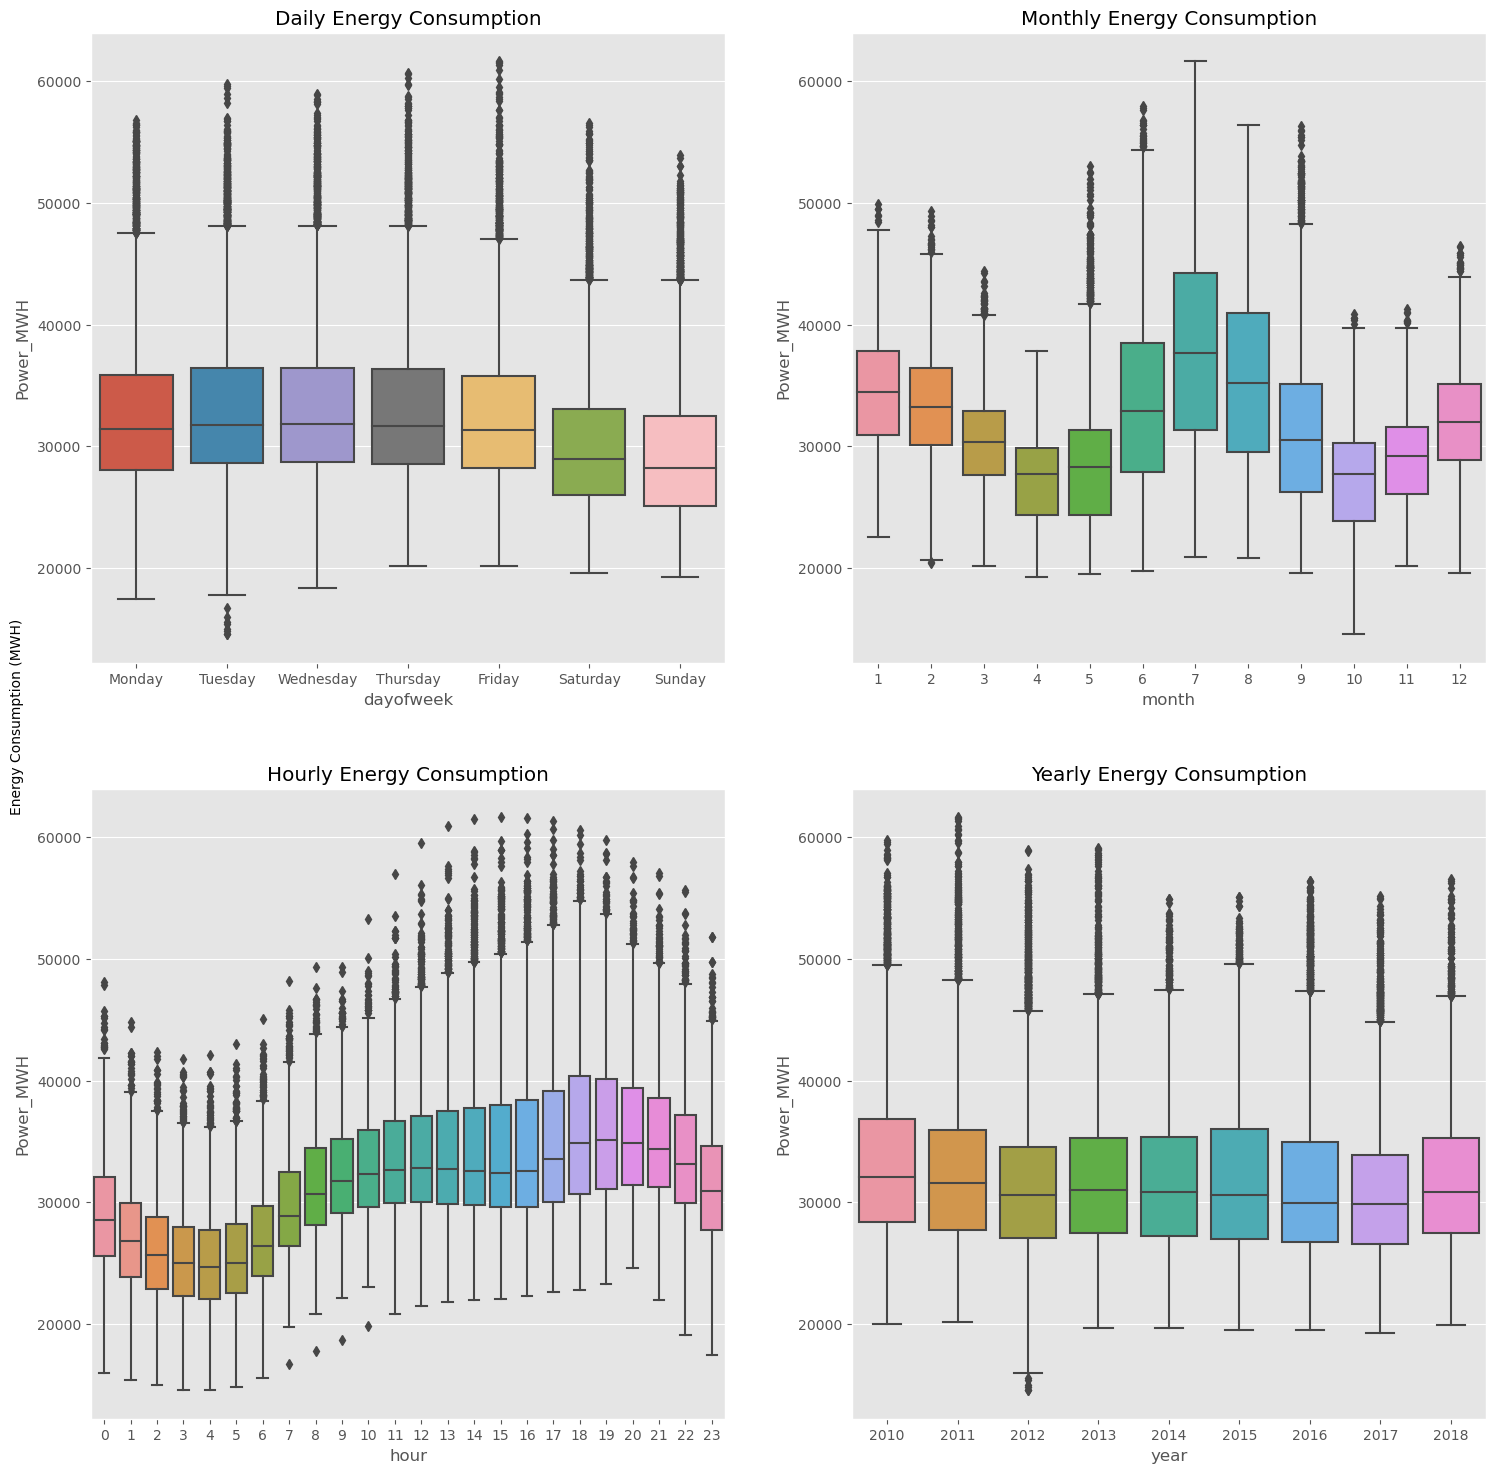

In [29]:
# Visualizing energy consumption over different time features like hourly, daily, weekly, monthly and yearly
fig, axes = plt.subplots(2, 2, figsize=(18,18))

# Day of Week
row_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
g = sns.boxplot(x=data.dayofweek, y=data.Power_MWH, ax=axes[0][0])
g.set_xticklabels(row_labels)
g.set_title('Daily Energy Consumption')

# Month of Year
g = sns.boxplot(x=data.month, y=data.Power_MWH, ax=axes[0][1])
g.set_title('Monthly Energy Consumption')

# Hour of Day
g = sns.boxplot(x=data.hour, y=data.Power_MWH, ax=axes[1][0])
g.set_title('Hourly Energy Consumption')

# Year
g = sns.boxplot(x=data.year, y=data.Power_MWH, ax=axes[1][1])
g.set_title('Yearly Energy Consumption')
fig.text(0.08, 0.5, 'Energy Consumption (MWH)', va='center', rotation='vertical')
plt.savefig('images/boxplots_energy_consumption.png')
plt.show()

## Observations
- The Weekly plot shows that energy consumption is higher during the weekdays i.e Monday-Friday and lower during the weekends(Sat&Sun) indicating high energy consumption during workdays of the week.
- The Monthly plot shows the energy consumption increase during the months of July-August indicating summer seasons and relatively drop during the winter seasons.
- The Hourly plot shows the increase in energy consumption during the daytime around 9am and dropping during the end of the day. This behaviour corresponds to the office work hours and hence the increase in energy consumed.
- The Yearly plot indicates a fairly consistent mean energy consumption and IQR.

## Statistical Exploration Of Data

### Determining whether to use additive/multiplicative seasonal decomposition of our data

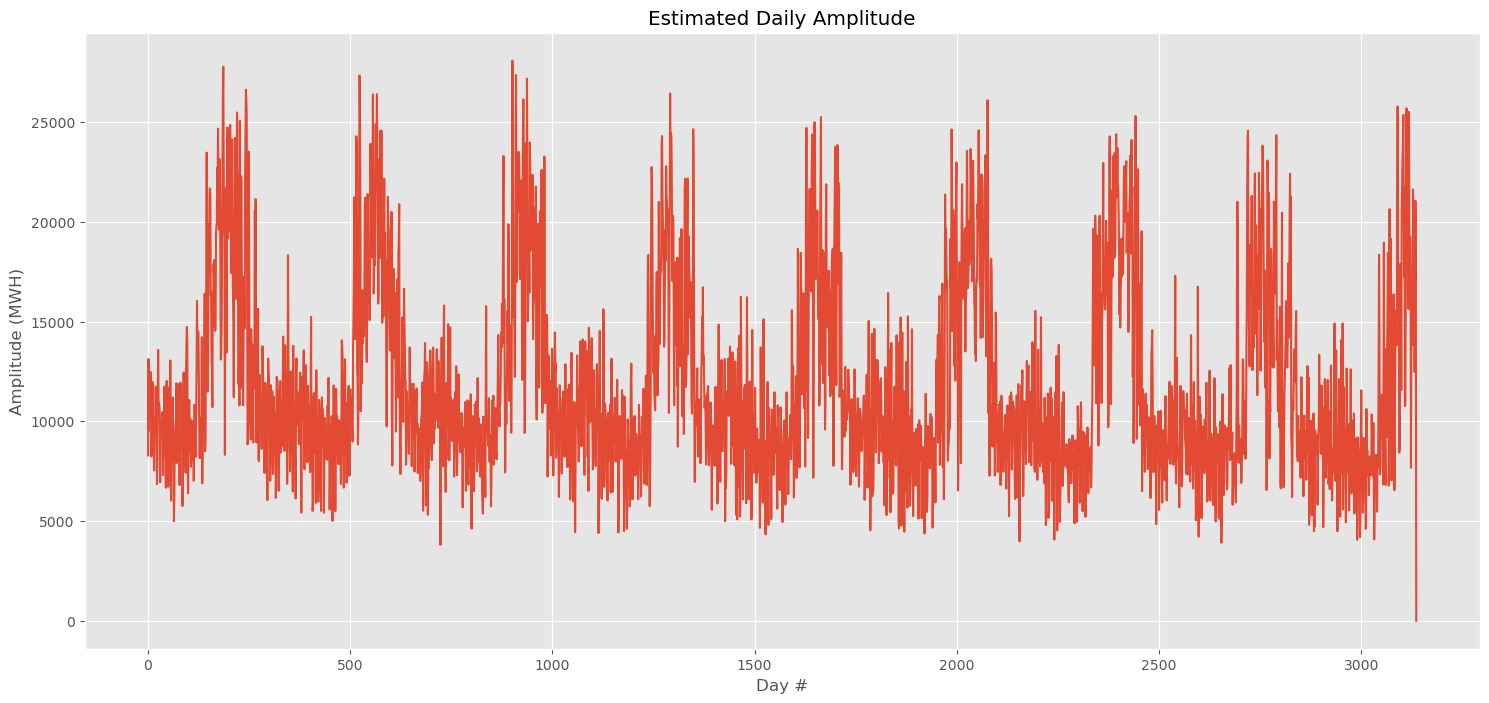

In [30]:
# Peak-to-peak Amplitude Plot to determine whether to use additive/multiplicative model
max_daily_vals = data.groupby(['year', 'dayofyear']).max()['Power_MWH'].values
min_daily_vals = data.groupby(['year', 'dayofyear']).min()['Power_MWH'].values
daily_amp = max_daily_vals - min_daily_vals
plt.plot(daily_amp)
plt.xlabel('Day #')
plt.ylabel('Amplitude (MWH)')
plt.title('Estimated Daily Amplitude')
plt.savefig('images/daily_amplitude.png')
plt.show()

## Observations
- We can see from the plot that the daily amplitude follows a seasonal pattern. Moreover we can also see that since the amplitude
changes over time, a multiplicative model is best suited for this data.

### Decomposition of our data to understand the trend, seasonal and residual(error) behaviour

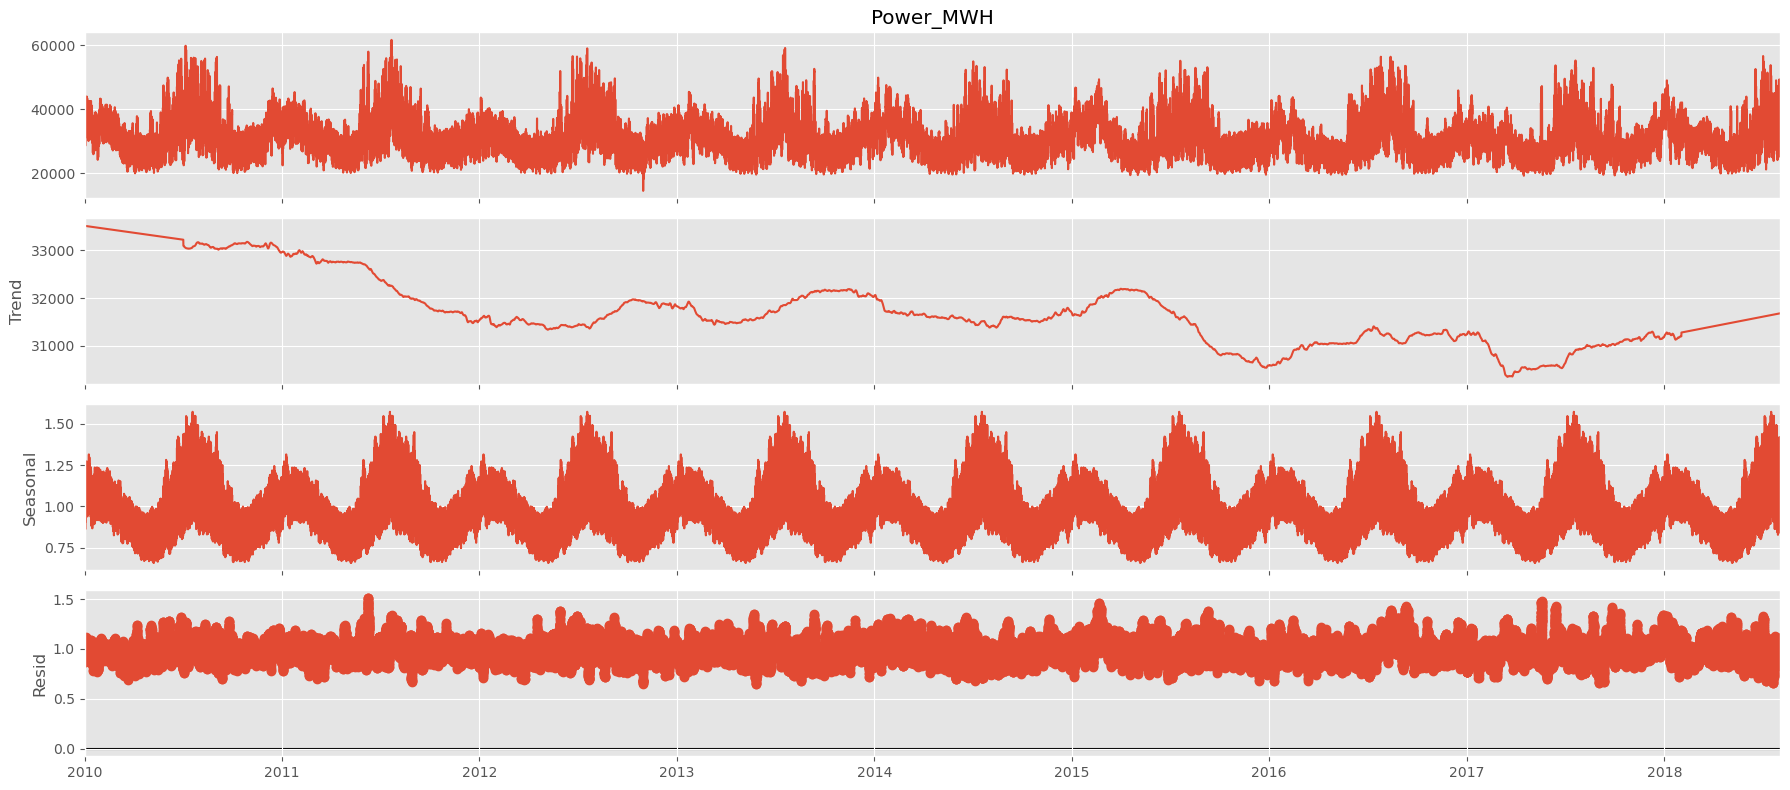

In [36]:
# Multiplicative Decomposition to break down our data into 3 time series components i.e trend, seasonality and residual.
from statsmodels.tsa.seasonal import seasonal_decompose


mult_decomp = seasonal_decompose(data["Power_MWH"], model="multiplicative", extrapolate_trend="freq", period=365*24)
mult_decomp.plot()
plt.savefig("images/multiplicative_decomp_plot.png")
plt.show();

## Observations
- The trend plot indicates a decreasing trend behavior over the years indicating the reduction in energy consumed.
- The seasonal plot indicates a consistent seasonal behaviour over the years and we can see seasonal peaks that corresponds to high energy consumption during the summer seasons.
- The residual plot indicates a fairly consistent mean over the years suggesting there might not be any outliers/random behaviour.

### Stationarity testing using ADF Test to determine of our data is stationary 

In [37]:
# Checking for stationarity using ADF Test
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(data["Power_MWH"])

print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

ADF Statistic: -13.217785856305605
p-value: 1.0161494554690668e-24


## Observations
- The p-value obtained from the ADF test i.e p-value < 0.05 indicates that our energy consumption data is stationary, however
the seasonal decomposition plot reveals a clear seasonal behaviour in our data.

### Applying differencing method to make our data stationary by removing the trend and seasonality for Statistical Modeling

Text(0, 0.5, 'Energy Consumption (MWH)')

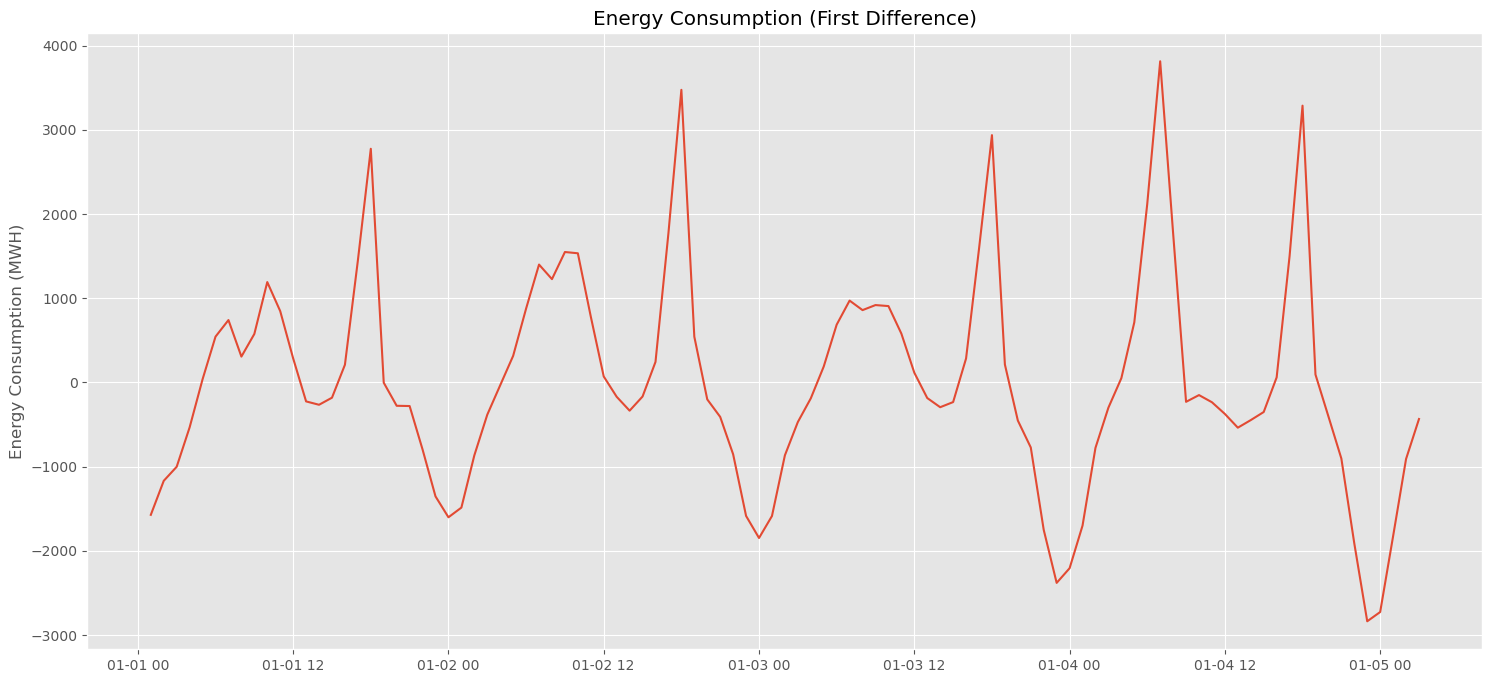

In [9]:
# Applying first order differencing of the data to make it stationary considering first 100 values
data["first_difference"] = data["Power_MWH"] - data["Power_MWH"].shift(1)
plt.plot(data.index[:100], data["first_difference"][:100])
plt.title("Energy Consumption (First Difference)")
plt.ylabel("Energy Consumption (MWH)")
# plt.savefig("images/first_difference.png")

## Observations
- In the above plot, we are using a first order differencing i.e a lag(1) to increase the stationarity. We can see the trend is removed but there still exists seasonality.

Text(0, 0.5, 'Energy Consumption (MWH)')

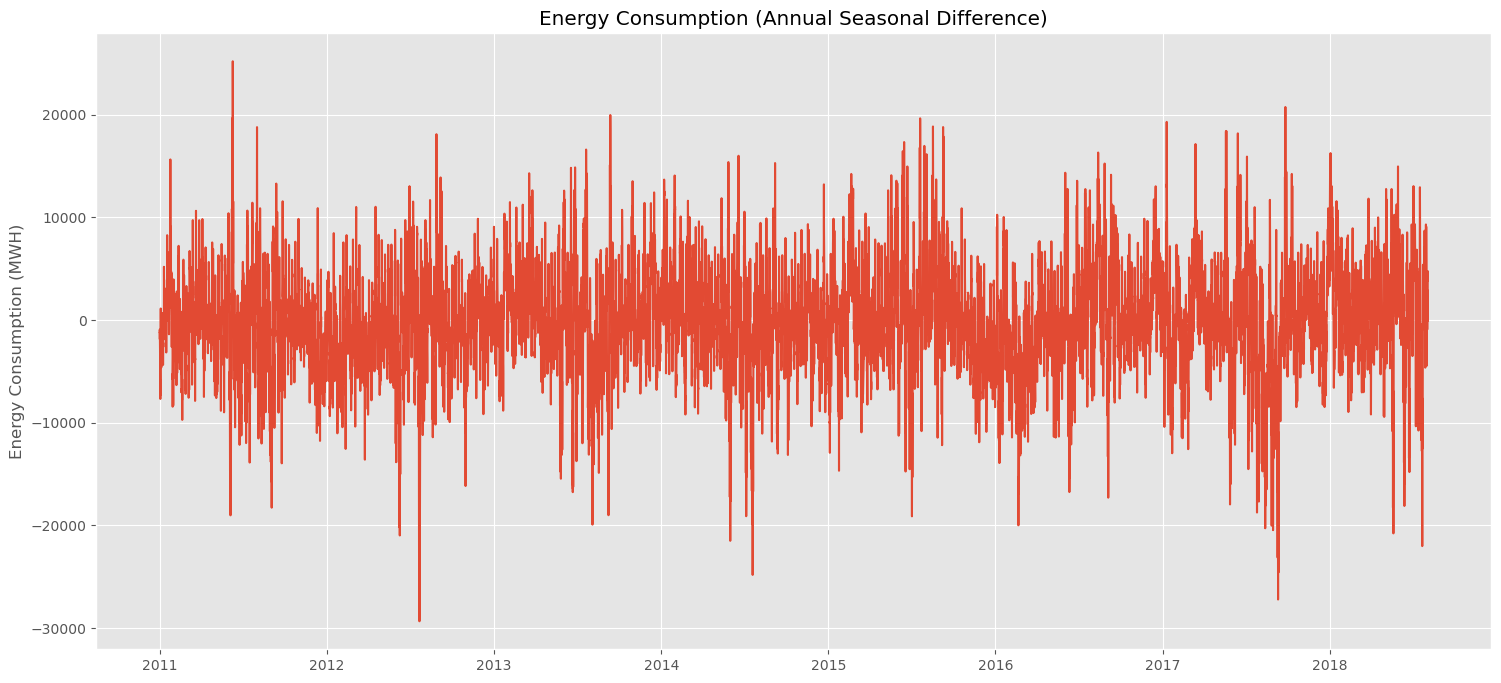

In [10]:
# Annual Seasonal Differencing considering first 1000 values
data["seasonal_differencing"] = data["Power_MWH"] - data["Power_MWH"].shift(365*24)
plt.plot(data.index, data["seasonal_differencing"])
plt.title("Energy Consumption (Annual Seasonal Difference)")
plt.ylabel("Energy Consumption (MWH)")
# plt.savefig("images/annual_seasonal_difference.png")

## Observations
- In the above plot, we are using an annual seasonal differencing(seasonal lag of 24hoursX365days in a year) method to remove the seasonal effect. And we can see the seasonal effect gradually decreasing.

In [41]:
adf_result = adfuller(data["seasonal_differencing"][24*365:])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

ADF Statistic: -20.589751356085397
p-value: 0.0


Text(0, 0.5, 'Energy Consumption (MWH)')

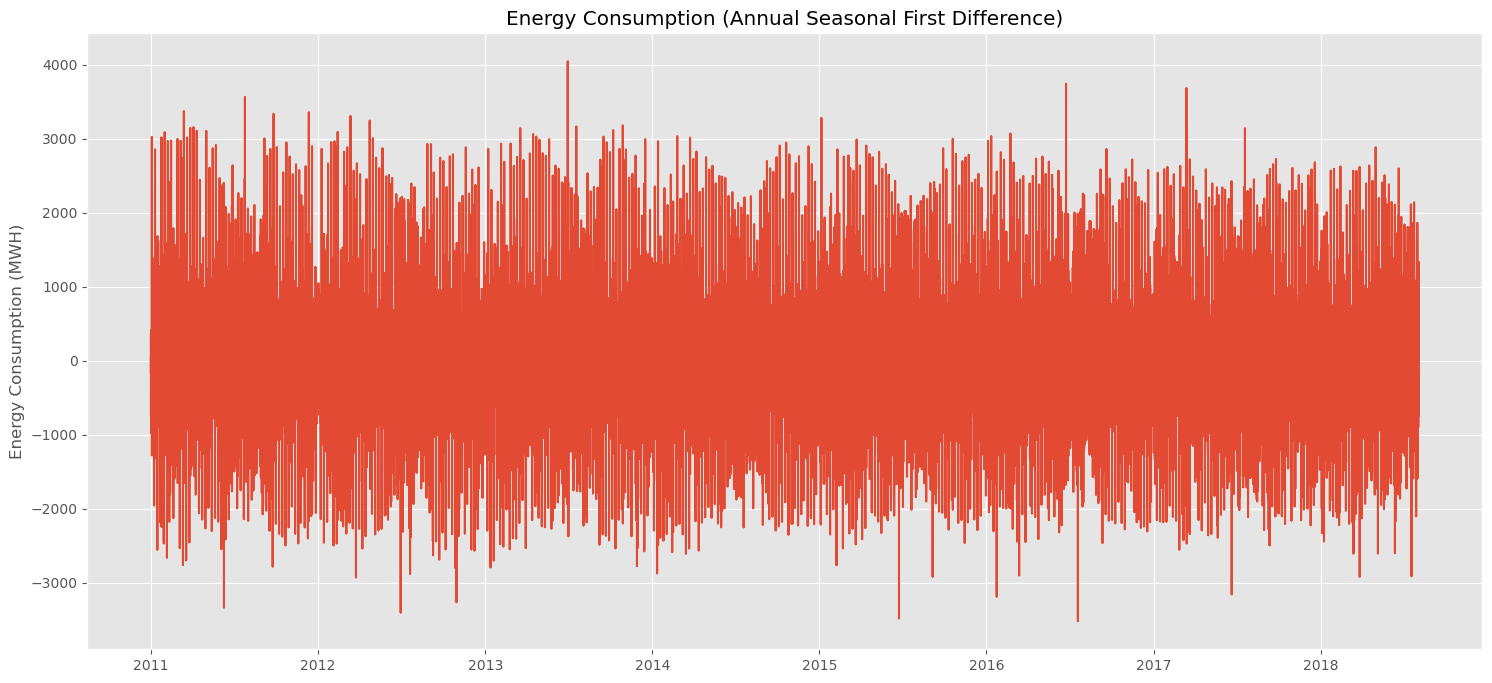

In [11]:
data["seasonal_first_difference"] = data["first_difference"] - data["first_difference"].shift(24*365)
plt.plot(data.index, data["seasonal_first_difference"])
plt.title("Energy Consumption (Annual Seasonal First Difference)")
plt.ylabel("Energy Consumption (MWH)")
# plt.savefig("images/annual_seasonal_first_difference.png")

## Observations
- In the above plot, we are further differencing the data to completely remove the seasonal effect and we can clearly see a constant mean and constant variance behaviour i.e stationary after differencing our data.

In [43]:
adf_result = adfuller(data["seasonal_first_difference"][(24*365)+1:])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

ADF Statistic: -43.54176160211564
p-value: 0.0


# Baseline Model Selection

### Baseline Modelling Methodology
- I decided to use a statistical time series model like ARIMA as the baseline since it is simple and easy to implement and is mostly used as the benchmark model for most of the time series forecasting tasks.

- To speed up the training process, I decided to use only the data after 1st Jan 2014 and forecast for only the next day.
- A one-step-forecasting approach was used for simplicity. 

- Mean Squared Error(average of the difference between the observed and predicted value) is chosen as the metric to evaluate our model as it allows for easy comparison of the performance of different forecast models against the baseline.

- A SARIMAX model of AR(1) model order(decided based on the Autocorrelation plots)  and 24 hour lag periodicity(to capture hourly seasonal behaviour in our data) is used as the baseline model.

### Plotting the ACF and PACF plots to determine the AR and MA orders

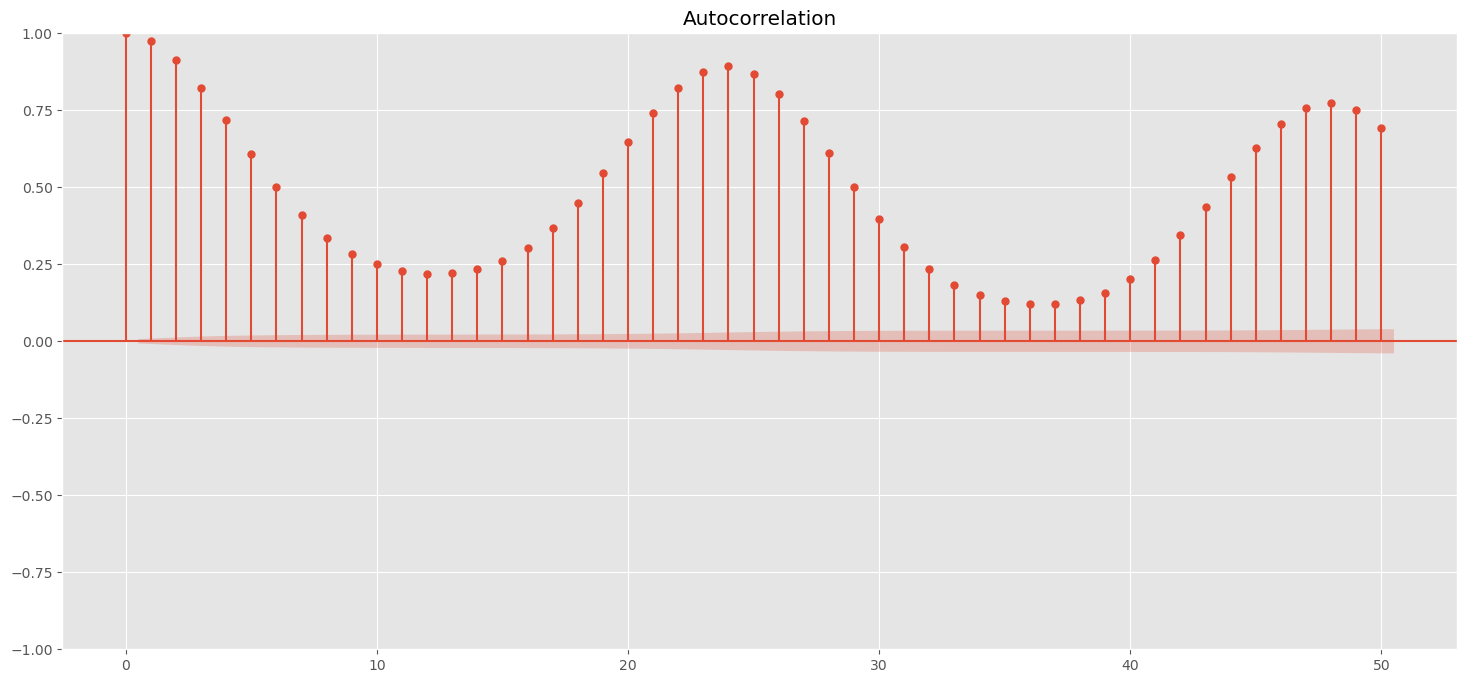

In [49]:
# Plotting ACF and PACF plots to determine the model orders for AR and MA model
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data["Power_MWH"], lags=50)
plt.savefig("images/acf_plot.png")
plt.show();

## Observations
- From the above ACF plot, we can infer that there is no need for a MA term to be added to the model since the lag-1 autocorrelation is positive 
and there is no sharp cut-off point.
- We can also observe the seasonal behaviour captured by the ACF plot

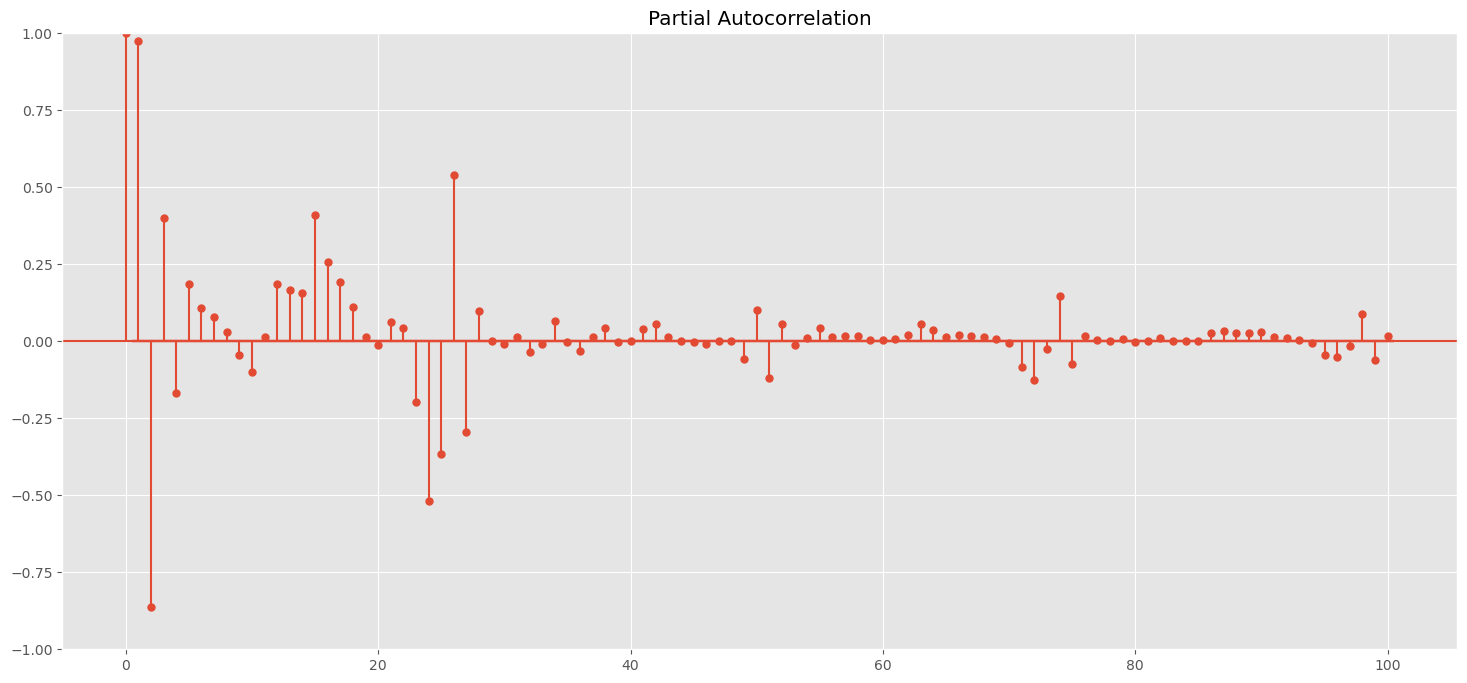

In [48]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Power_MWH"], lags=100)
plt.savefig("images/pacf_plot.png")
plt.show();

## Observations
- From the above PACF plot, we can observe that the PACF is highly significant for the first 24 hour lag cycle and then drops off sharply. Based on this it would be appropriate to use an AR(24) model, however a drawback to using an order this large is that it slows down the model training time.

## SARIMA Model Implementation

### Benefit of using this model
- SARIMA is chosen as the baseline model as it incorporates seasonality i.e it uses seasonal terms(P,D,Q) unlike ARIMA(p,d,q) and models data with clear seasonal trends.

In [13]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime

In [14]:
train_data = data.loc[(data.index >= datetime(2014,1,1)) & (data.index < datetime(2018,8,1)), "Power_MWH"]
test_data = data.loc[(data.index >= datetime(2018,8,1)), "Power_MWH"]

In [15]:
train_data.head()

Datetime
2014-01-01 00:00:00    32595.0
2014-01-01 01:00:00    31440.0
2014-01-01 02:00:00    30626.0
2014-01-01 03:00:00    29949.0
2014-01-01 04:00:00    29716.0
Freq: H, Name: Power_MWH, dtype: float64

### AR(1) SARIMAX Model Implementation(Baseline Model)

C:\Users\balaj\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model run time: 2199.8217203617096 seconds
MSE: 264762


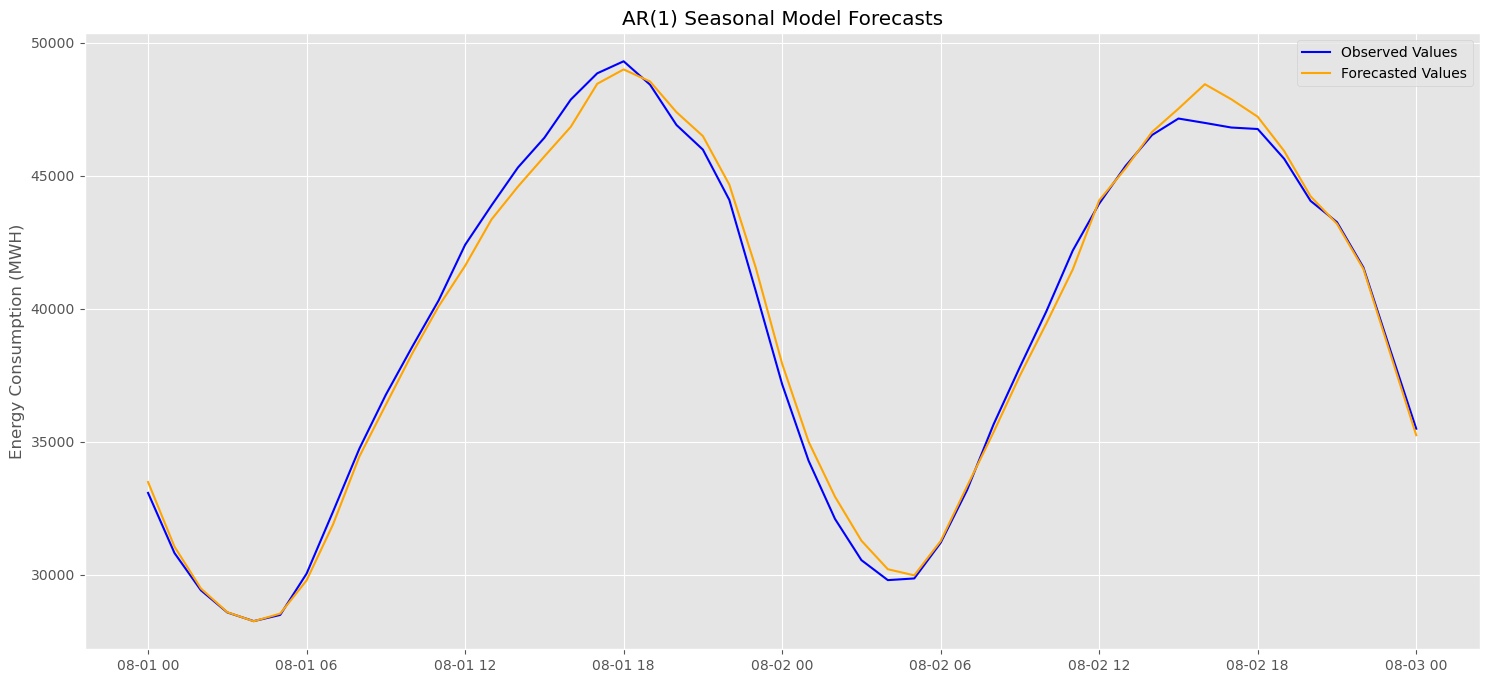

In [23]:
import time

sar_pred = []
history = [x for x in train_data]

start = time.time()
for t in range(len(test_data)):
    model = SARIMAX(history, order=(1,0,0), seasonal_order=(1,0,0,24), enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit()
    output = model_fit.forecast()
    sar_pred.append(output[0])
    history.append(test_data[t])

end = time.time()
print(f"Model run time: {end-start} seconds")
sar_pred_series = pd.Series(sar_pred, index=test_data.index)

error = mean_squared_error(test_data, sar_pred_series)
print("MSE: %3.f" % error)

plt.plot(test_data, color="blue", label="Observed Values")
plt.plot(sar_pred_series, color="orange", label="Forecasted Values")
plt.legend()
plt.title('AR(1) Seasonal Model Forecasts')
plt.ylabel('Energy Consumption (MWH)')
plt.savefig('images/baseline_model.png')
plt.show()

## Possible Models to forecast and compare against the baseline

   ### 1. Simple Exponential Smoothing

#### Pros
- Gives weightage to more recent observations in the data thereby reducing the influence of past observations on the forecast values. 

#### Cons
- Does not work well with data having clear seasonal trends and therefore cannot be used with our data as there are clear indications of seasonality

### 2. Triple Exponential Smoothing

#### Pros
- Major strength of this model is its ability to incorporate both trend and seasonality unlike simple exponential smoothing.

#### Cons
- With respect to our data, using a seasonal period of 24*365 helps the model to better capture the annual seasonal trends present in our data but it will take a long time to train due to which we cannot use for our exercise

### 3. Prophet

#### Pros
- Very easy to implement as it does not require much technical expertise and allows the model to incorporate holidays and exogenous variables.

#### Cons 
- Since we do not know the demographic location of our data, we cannot choose the right country's holidays to incorporate into our model and so we may not benefit from using this model for our exercise.

## Final Model Selection Approach
- As I wanted to gradually increase the complexity of the model and due to time constraints, I decided to stick with SARIMAX modelling and experiment with different combinations of the AR, MA and seasonal lags as my final model for this exercise.


- I tried to use a SARIMAX model with an order of (1,1,1) to better incorporate the AR terms as it seemed more important from the ACF&PACF plots, first order differencing to improve model performance and a 24 hour seasonal period to better capture the seasonal effect of the data.

- I used the same one-step-forecast approach for this exercise

### Benefit of this model
- It can capture both seasonal and non-seasonal effects present in our data
- Requires comparatively less time to train the models.

### Limitations of the final model
- Not able to incorporate exogenous variables that could influence the forecast.
- It does not allow for more than one type of seasonality i.e daily, weekly, monthly ..

In [24]:
## SARIMA Model Implementation

In [1]:
# import time

# sarima_pred = []
# history = [x for x in train_data]

# start = time.time()
# for t in range(len(test_data)):
#     model = SARIMAX(history, order=(1,1,1), seasonal_order=(1,1,1,24), enforce_stationarity=False, enfore_invertibility=False)
#     model_fit = model.fit()
#     output = model_fit.forecast()
#     sarima_pred.append(output[0])
#     history.append(test_data[t])

# end = time.time()
# print(f"Model run time: {end-start} seconds")
# sarima_pred_series = pd.Series(sarima_pred, index=test_data.index)

# error = mean_squared_error(test_data, sarima_pred_series)
# print('MSE: %.3f' % error)

# plt.plot(test_data, color="blue", label="Observed Values")
# plt.plot(sarima_pred_series, color="orange", label="Forecasted Values")
# plt.legend()
# plt.title('SARIMA Model Forecasts')
# plt.ylabel('Energy Consumption (MWH)')
# plt.savefig('images/sarima_model.png')
# plt.show()

## Conclusions

#### Final Modelling Comparison
As I ran into some memory allocation issues and due to time constraint I couldn't the final model evaluation

### Recommendations
- We could accurately forecast the energy consumption if we were provided with additional data related to building occupancy density and type of cooling system used as these are very significant factors influencing power consumption according to studies conducted on government office buildings in Qingdao.

- Additional provision of temperature data could help with accurate energy demand forecasting.

- We would also need to account for COVID like situations as this information is not available with the historical data provided.

- Availability of Demographic data will also significantly help with our forecast.